![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Image Classification using Pretrained Models

*Domingo Mery*

Adapted from:
https://www.kaggle.com/agggshambhavi/pytorch-transfer-learning
and this code for VGG using [Google Colab](https://colab.research.google.com/github/bentrevett/pytorch-image-classification/blob/master/4_vgg.ipynb)

# Data

Please choose one of the following two datasets

## Toy Example

Fast and easy

In [ ]:
# Rock+Paper+Scissors: 3 classes (toy example)
!wget https://www.dropbox.com/s/lz8ci7zwb3hbzlx/RockPaperScissors.zip
!unzip -qq RockPaperScissors.zip
fpath = 'RockPaperScissors/'
num_classes = 3

--2023-10-24 17:50:07--  https://www.dropbox.com/s/lz8ci7zwb3hbzlx/RockPaperScissors.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lz8ci7zwb3hbzlx/RockPaperScissors.zip [following]
--2023-10-24 17:50:07--  https://www.dropbox.com/s/raw/lz8ci7zwb3hbzlx/RockPaperScissors.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc08afd73bb0f3795b82dba04d34.dl.dropboxusercontent.com/cd/0/inline/CGNFsLru-SU7biHIsHijWVp1KlGhBhZG4qA5hYM-QD2ZyflTJtg4X-NAaMf9ttUAVi3Vk-8DaIux4zvEWqN-0fFqD8RlkeZfHEXnS0vVO-rDVA4d-sfewPyV9K6tAQowcaQ/file# [following]
--2023-10-24 17:50:08--  https://uc08afd73bb0f3795b82dba04d34.dl.dropboxusercontent.com/cd/0/inline/CGNFsLru-SU7biHIsHijWVp1KlGhBhZG4qA5hYM-QD2ZyflTJtg4X-NAaMf9ttUAVi3Vk-8DaIux4zvEWqN-0fFqD8Rlk

## Skin lesion recognition

In [ ]:
# skin lesions: 7 classes
!wget https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
!unzip -qq exp4val.zip
fpath = ''
num_classes =  7

--2022-11-25 22:55:33--  https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nzrvuoos7sgl5dh/exp4val.zip [following]
--2022-11-25 22:55:33--  https://www.dropbox.com/s/raw/nzrvuoos7sgl5dh/exp4val.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccd80d426501fcca9a03fd0a9d0.dl.dropboxusercontent.com/cd/0/inline/Bxfar-OsgmJb1LjouIEPPCGjIEm9XzdqsNnsl_JYbmfjvIVjx-_bPoxdXIZbuBdT56m5o66LjVsTKvmZyCmdRWtU7CupXopIwohBDeLZYTHttjeGMdaQiaaCmYC1Vs0vVZ6W0A6klnXMR4gAhtwt3vJDgu2RlimHyUDjExT-5HZoEw/file# [following]
--2022-11-25 22:55:33--  https://uccd80d426501fcca9a03fd0a9d0.dl.dropboxusercontent.com/cd/0/inline/Bxfar-OsgmJb1LjouIEPPCGjIEm9XzdqsNnsl_JYbmfjvIVjx-_bPoxdXIZbuBdT56m5o66LjVsTKvmZyCm

In [ ]:
import torch
import os,sys
import numpy as np
from torchvision import models

# Utils

In [ ]:
util = 'pretrain_utils'
utilpy = util+'.py'
if os.path.isfile(utilpy):
  del sys.modules[util]
  os.remove(utilpy)
  print(util+' removed.')
print(util+' ready to load.')

#!wget https://www.dropbox.com/s/ia4ffc5hcz1rcv8/pretrain_utils.py
!wget https://www.dropbox.com/scl/fi/qsrl2rf77j59e5iyged4u/pretrain_utils3.py?rlkey=8z6azw3vnuvih1evp0ii6nokz
!mv pretrain_utils3.py?rlkey=8z6azw3vnuvih1evp0ii6nokz pretrain_utils.py
from pretrain_utils import loaderdef,modeldef,showimages,evaluate,megatrain,printaccm,get_predictions,plot_confusion_matrix
print('pretrain_utils module has been loaded')

pretrain_utils ready to load.
--2023-10-24 17:50:18--  https://www.dropbox.com/scl/fi/qsrl2rf77j59e5iyged4u/pretrain_utils3.py?rlkey=8z6azw3vnuvih1evp0ii6nokz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d887c9c4e3c3d1460f44d5f1f.dl.dropboxusercontent.com/cd/0/inline/CGO9olLA0ujbr4dd0EvpCbtXZ9RiyVdqFup4rw2Q9Hb64XNNHgwCw2L_sW89NqcqD969C1pQAgibLDMCIEozrutCol-iCrMvmDg3yvyy-aMeO3QyNDLw68ol33ZLh7q4W3s/file# [following]
--2023-10-24 17:50:20--  https://uc3d887c9c4e3c3d1460f44d5f1f.dl.dropboxusercontent.com/cd/0/inline/CGO9olLA0ujbr4dd0EvpCbtXZ9RiyVdqFup4rw2Q9Hb64XNNHgwCw2L_sW89NqcqD969C1pQAgibLDMCIEozrutCol-iCrMvmDg3yvyy-aMeO3QyNDLw68ol33ZLh7q4W3s/file
Resolving uc3d887c9c4e3c3d1460f44d5f1f.dl.dropboxusercontent.com (uc3d887c9c4e3c3d1460f44d5f1f.dl.dropboxusercontent.com)... 162.125.85.15, 2620:100

# Train/Val/Test dataset

In [ ]:
# hyper parameters
BATCH_SIZE    = 70
num_epochs    = 100

Number of Samples:
   Train: 2520
     Val: 372
    Test: 33
torch.Size([3, 224, 224])


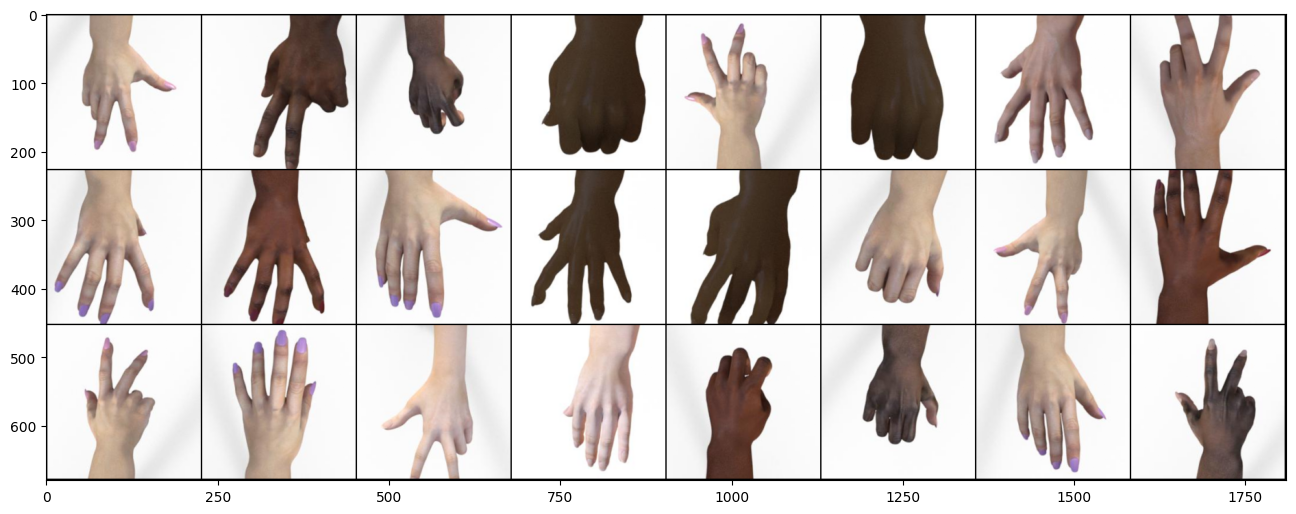

In [ ]:
train_loader,val_loader,test_loader = loaderdef(fpath,False,BATCH_SIZE,show=True)

# Pytorch Models
[Pytorch models](https://pytorch.org/vision/stable/models.html)

In [ ]:
!mkdir models # in this folder, the trained models will be stored

# Training

In [ ]:
EARLY_STOP = 5
model_list = ['cnn','cnn-s','cnn-m','cnn-l',
              'shufflenet_v2_x1_0','shufflenet_v2_x0_5',
              'efficientnet_b0','efficientnet_b1','efficientnet_b2','efficientnet_b3',
              'squeezenet1_0',
              'mobilenet_v2','mobilenet_v3_small','mobilenet_v3_large',
              'googlenet','alexnet',
              'resnet18','resnet34','resnet50','resnet101','resnet152','resnext50_32x4d','wide_resnet50_2',
              'vgg11','vgg13','vgg16','vgg19',
              'vgg11_bn','vgg13_bn','vgg16_bn','vgg19_bn',
              'densenet161','densenet201',
              'vit_b_16','vit_b_32',
              ]

model_list = ['resnet18','convnext_small']
n          = len(model_list)
acc        = np.zeros((n,4))
sta        = np.zeros((n,5))
for i in range(n):
  modelname = model_list[i]
  print(f'{i+1:03}/{n:03} | processing model {modelname}')
  model,modelfamily,trans_norm = modeldef(modelname,num_classes)
  train_loader,val_loader,test_loader = loaderdef(fpath,trans_norm,BATCH_SIZE)
  acc[i,:],sta[i,:] = megatrain(model,modelname,modelfamily,train_loader,val_loader,test_loader,num_epochs,early_stop=EARLY_STOP)
  printaccm(acc,sta,i,model_list)

001/002 | processing model resnet18


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 198MB/s]


name:  resnet18  family:  resnet
Number of resnet features =  512
Trainable parameters: 11,178,051 


Searching best LR:   0%|          | 0/100 [00:00<?, ?it/s]

Early stop in LR searching.


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 000 | Epoch Time: 0m 9s |  Train Acc: 0.9714 |  Val Acc: 1.0000 * |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 001 | Epoch Time: 0m 9s |  Train Acc: 0.9996 |  Val Acc: 0.9976   |  Test Acc: 0.9697


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 002 | Epoch Time: 0m 9s |  Train Acc: 1.0000 |  Val Acc: 0.9857   |  Test Acc: 0.9394


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 003 | Epoch Time: 0m 9s |  Train Acc: 1.0000 |  Val Acc: 1.0000   |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 004 | Epoch Time: 0m 9s |  Train Acc: 0.9988 |  Val Acc: 0.7537   |  Test Acc: 0.7273


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 005 | Epoch Time: 0m 9s |  Train Acc: 0.9937 |  Val Acc: 0.9591   |  Test Acc: 0.9697
Early stop after  5  epochs...
Best model saved in models/best_model_resnet18.pt.
Best results (accuracy):
-------------------------------------------------------------------------------------------------------------
 i  | Model                 |  Delta  |    Time  |   Params  |  Feats   | Epochs | Train  |  Val   |   Test
-------------------------------------------------------------------------------------------------------------
001 | resnet18              |  9.0704 |   0.7559 |   11.1781 |  0.5120  |     6  | 0.9714 | 1.0000 |  1.0000 
-------------------------------------------------------------------------------------------------------------
002/002 | processing model convnext_small


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Small_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_small-0c510722.pth" to /root/.cache/torch/hub/checkpoints/convnext_small-0c510722.pth
100%|██████████| 192M/192M [00:00<00:00, 208MB/s]


name:  convnext_small  family:  convnext
Number of convnext features =  768
Trainable parameters: 49,456,995 


Searching best LR:   0%|          | 0/100 [00:00<?, ?it/s]

Early stop in LR searching.


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 000 | Epoch Time: 1m 50s |  Train Acc: 0.9012 |  Val Acc: 0.9881 * |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 001 | Epoch Time: 1m 49s |  Train Acc: 1.0000 |  Val Acc: 0.9810   |  Test Acc: 0.9697


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 002 | Epoch Time: 1m 50s |  Train Acc: 1.0000 |  Val Acc: 0.9881 * |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 003 | Epoch Time: 1m 50s |  Train Acc: 1.0000 |  Val Acc: 0.9881   |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 004 | Epoch Time: 1m 49s |  Train Acc: 1.0000 |  Val Acc: 0.9881   |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 005 | Epoch Time: 1m 50s |  Train Acc: 1.0000 |  Val Acc: 0.9881   |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 006 | Epoch Time: 1m 50s |  Train Acc: 1.0000 |  Val Acc: 0.9881   |  Test Acc: 1.0000


Training:   0%|          | 0/36 [00:00<?, ?it/s]

Validation:   0%|          | 0/6 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 007 | Epoch Time: 1m 49s |  Train Acc: 1.0000 |  Val Acc: 0.9881   |  Test Acc: 1.0000
Early stop after  5  epochs...
Best model saved in models/best_model_convnext_small.pt.
Best results (accuracy):
-------------------------------------------------------------------------------------------------------------
 i  | Model                 |  Delta  |    Time  |   Params  |  Feats   | Epochs | Train  |  Val   |   Test
-------------------------------------------------------------------------------------------------------------
001 | resnet18              |  9.0704 |   0.7559 |   11.1781 |  0.5120  |     6  | 0.9714 | 1.0000 |  1.0000 
002 | convnext_small        | 109.9157 |  12.8235 |   49.4570 |  0.7680  |     8  | 1.0000 | 0.9881 |  1.0000 
-------------------------------------------------------------------------------------------------------------


#Evaluation on Testing

In [ ]:
import torch.nn as nn
besti = np.argmax(acc[:,1]) # best model: best accuracy in validation set
modelname   = model_list[besti]
model,modelfamily,trans_norm = modeldef(modelname,num_classes)
train_loader,val_loader,test_loader = loaderdef(fpath,trans_norm,BATCH_SIZE)
device      = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion   = nn.CrossEntropyLoss()
model       = model.to(device)
criterion   = criterion.to(device)

model.load_state_dict(torch.load('models/best_model_'+modelname+'.pt'))
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

name:  resnet18  family:  resnet
Number of resnet features =  512
Trainable parameters: 11,178,051 


Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

Test Loss: 0.011 | Test Acc: 100.00%


# Confusion Matrix

  0%|          | 0/1 [00:00<?, ?it/s]

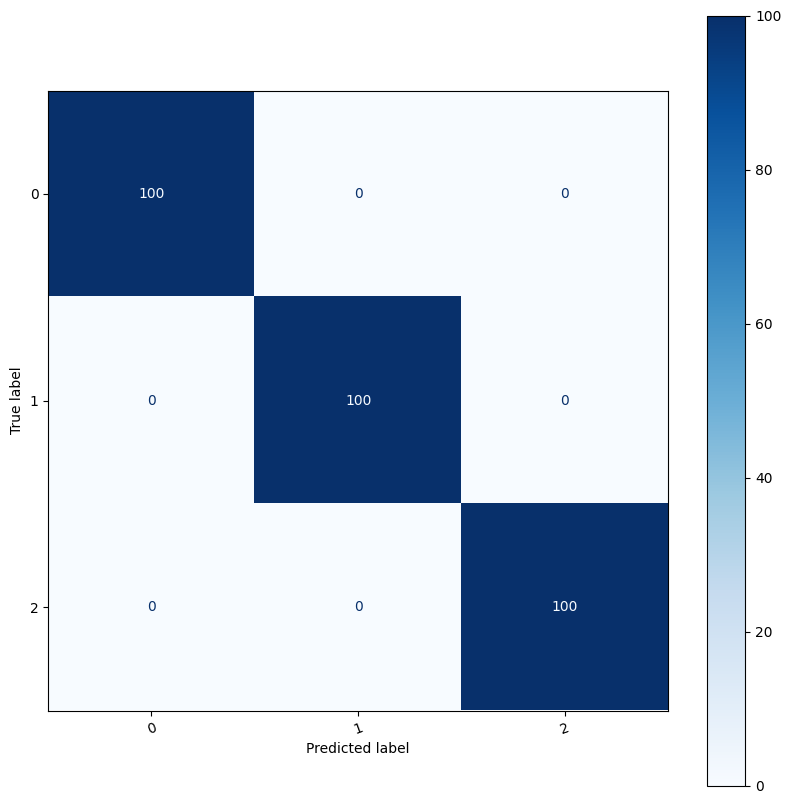

In [ ]:
ld = test_loader # val_loader or train_loader

images, labels, probs = get_predictions(model,ld,device)
pred_labels = torch.argmax(probs,1)
plot_confusion_matrix(labels,pred_labels,range(num_classes),norm=True)